In [676]:
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

In [677]:
# Loading the data, it comes from a lot of joined datasets
df = pd.read_csv("train_data.csv", index_col=0).reset_index(drop=True)
df.head()

C:\Users\vojte\AppData\Local\Temp\ipykernel_13416\9966111.py:2: DtypeWarning: Columns (65,76,91,154,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_data.csv", index_col=0).reset_index(drop=True)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,GBH,GBD,GBA,IWH,IWD,IWA,SBH,SBD,SBA,WHH,WHD,WHA,country,league,season,SYH,SYD,SYA,B365H,B365D,B365A,GB>2.5,GB<2.5,GBAHH,GBAHA,GBAH,BWH,BWD,BWA,LBH,LBD,LBA,B365AHH,B365AHA,B365AH,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,BSH,BSD,BSA,PSH,PSD,PSA,PSCH,PSCD,PSCA,HS,AS,HST,AST,HFKC,AFKC,HC,AC,HY,AY,HR,AR,Time,HF,AF,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Attendance,Referee,HHW,AHW,HO,AO,HBP,ABP,SOH,SOD,SOA,LBAHH,LBAHA,LBAH,LB,LB.1,LB.2,HT,AT
0,B1,20/05/01,Mechelen,Lierse,1.0,1.0,D,1.0,1.0,D,2.52,3.10,2.47,NaN,NaN,NaN,NaN,NaN,NaN,2.40,3.40,2.35,belgium,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B1,17/09/00,Germinal,Club Brugge,2.0,3.0,A,0.0,1.0,A,3.60,3.50,1.80,3.20,3.1,1.85,3.50,3.3,NaN,3.10,3.30,1.95,belgium,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B1,14/10/00,Beveren,Standard,0.0,3.0,A,0.0,2.0,A,3.30,3.40,1.85,3.40,3.2,1.75,3.20,3.4,NaN,3.25,3.45,1.85,belgium,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B1,06/09/00,Lokeren,Mechelen,3.0,2.0,H,0.0,2.0,A,1.66,3.50,3.95,1.55,3.3,4.50,1.67,3.5,NaN,1.70,3.50,3.80,belgium,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,27/08/00,Charleroi,Antwerp,1.0,0.0,H,1.0,0.0,H,1.60,3.35,4.80,1.60,3.3,4.00,1.62,3.5,NaN,1.60,3.40,4.50,belgium,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

<Axes: >

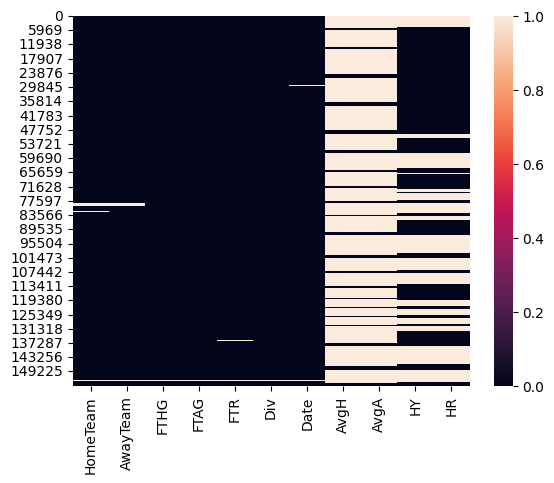

In [678]:
# Let's look at the NA structure of some important variables
selected_vars = ["HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "Div", "Date", "AvgH", "AvgA", "HY", "HR"]
sns.heatmap(df[selected_vars].isna())

In [679]:
# Drop information that cannot be substituted
def dropnas(df):
    df = df.loc[~df["FTHG"].isna() & ~df["FTAG"].isna()].copy()
    df = df.loc[~df["HTHG"].isna() & ~df["HTAG"].isna()].copy()
    df = df.loc[~df["HomeTeam"].isna() & ~df["AwayTeam"].isna()].copy()
    df = df.loc[~df["Div"].isna() & ~df["Date"].isna()].copy()
    return df

print("Nrows before dropping:", df.shape[0])
df = dropnas(df)
print("Nrows after dropping:", df.shape[0])

Nrows before dropping: 155173
Nrows after dropping: 153086


In [680]:
# Teams have some missing information, but we can drop it as it makes up the minority of the data
# The odds of each team winning have a lot of missing values, so we have to calculate it
# Similarly, information about yellow and red cards is sparse. We have to find a way to encode it or use whatever is useful

In [681]:
# Let's analyze some columns for outliers
for quant in [0.01, 0.1, 0.5, 0.9, 0.99]:
    print("Quantile:", quant, "Home goals:", df["FTHG"].quantile(quant), "Away goals:", df["FTAG"].quantile(quant))

Quantile: 0.01 Home goals: 0.0 Away goals: 0.0
Quantile: 0.1 Home goals: 0.0 Away goals: 0.0
Quantile: 0.5 Home goals: 1.0 Away goals: 1.0
Quantile: 0.9 Home goals: 3.0 Away goals: 3.0
Quantile: 0.99 Home goals: 5.0 Away goals: 4.0


In [682]:
# Realistically, we can expect there to be less than 5 goals from each side in a match, but well cap it off at 10 for good measure
print("Nrows before dropping:", df.shape[0])
df = df.loc[~df["FTAG"].isna() & ~df["HTAG"].isna() & ~df["FTHG"].isna() & ~df["HTHG"].isna()].copy()
df = df.loc[(df["FTAG"] >= 0) & (df["FTAG"]<= 10) & (df["FTAG"] >= 0) & (df["FTHG"] <= 10)].copy()
print("Nrows after dropping:", df.shape[0])

Nrows before dropping: 153086
Nrows after dropping: 152709


<Axes: xlabel='FTAG', ylabel='Count'>

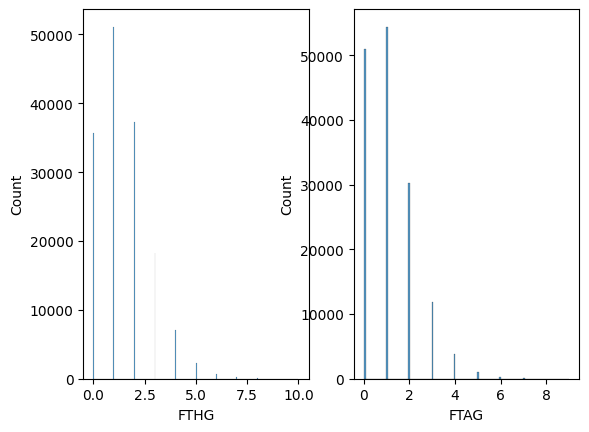

In [683]:
# Let's analyze some columns for outliers
fig, axs = plt.subplots(nrows=1, ncols=2)
sns.histplot(df["FTHG"], ax=axs[0])
sns.histplot(df["FTAG"], ax=axs[1])

In [684]:
# Let's see if we can fill in odds values
bet_columns = ["B365", "BS", "BW", "GB", "IW", "LB", "PS", "SO", "SB", "SJ", "SY", "VC", "WH"]
home_bet = [col+"H" for col in bet_columns]
draw_bet = [col+"D" for col in bet_columns]
away_bet = [col+"A" for col in bet_columns]

df["AvgH"] = df[home_bet].mean(axis=1)
df["AvgD"] = df[draw_bet].mean(axis=1)
df["AvgA"] = df[away_bet].mean(axis=1)

<Axes: xlabel='AvgH', ylabel='Count'>

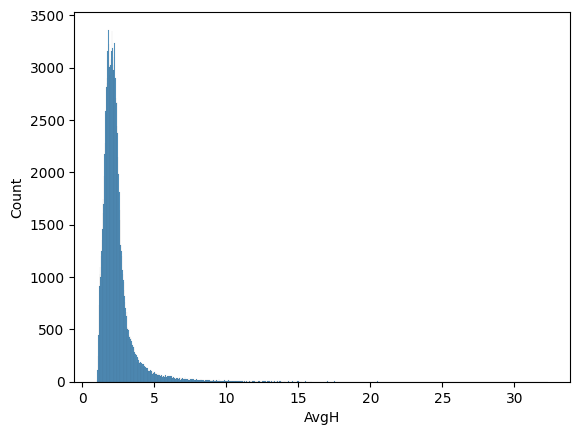

In [685]:
# The odds for home team have quite a high spread, let's analyze if all odds values are valid
sns.histplot(df["AvgH"])

<Axes: xlabel='OddsInv', ylabel='Count'>

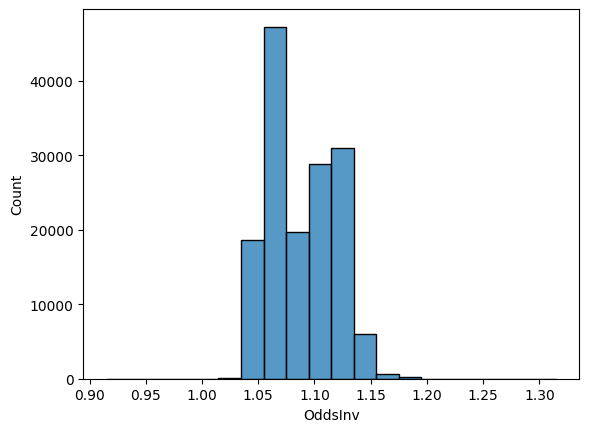

In [686]:
df["InvH"] = 1 / df["AvgH"]
df["InvD"] = 1 / df["AvgD"]
df["InvA"] = 1 / df["AvgA"]

df["OddsInv"] = df["InvH"] + df["InvD"] + df["InvA"]
sns.histplot(df["OddsInv"], binwidth=0.02)

In [687]:
# The good news is, that none of the odds sum are bellow 1, as that would mean a loss for the broker
# We can see that some brokers collect a higher premium for the bets, reaching almost 20% in some cases
print("Nrows before dropping:", df.shape[0])
df = df.loc[(df["OddsInv"]>1) & ~df["AvgH"].isna() & ~df["AvgD"].isna() & ~df["AvgA"].isna()]
print("Nrows after dropping:", df.shape[0])

Nrows before dropping: 152709
Nrows after dropping: 152350


In [688]:
# Now let's fill in the missing half-time and full-time results
def calculate_win(home_goals, away_goals):
    results = []
    for home, away in zip(home_goals, away_goals):
        if home < away:
            results.append("A")
        elif home > away:
            results.append("H")
        else:
            results.append("D")
    return results

df["HTR"] = calculate_win(df["HTHG"], df["HTAG"])
df["FTR"] = calculate_win(df["FTHG"], df["FTAG"])

print("Nrows before dropping:", df.shape[0])
df = df.loc[~df["HTR"].isna() & ~df["FTR"].isna()]
print("Nrows after dropping:", df.shape[0])

Nrows before dropping: 152350
Nrows after dropping: 152350


In [689]:
df.groupby(["HTR", "FTR"])["Date"].count()

HTR  FTR
A    A      24197
     D       7628
     H       3845
D    A      16040
     D      25206
     H      23737
H    A       2936
     D       7950
     H      40811
Name: Date, dtype: int64

In [690]:
# We can see that the home team wins a large majority of all matches, but this shouldn't be a problem

In [691]:
# Parse dates for later sampling
df["Date"] = df["Date"].apply(
        lambda date: datetime.strptime(date, "%d/%m/%y") if len(date)==8 else datetime.strptime(date, "%d/%m/%Y")
    )

In [692]:
# Some columns have a lot of missing values
# We will handpick the important parameters and restrict the dataframe
most_missing = pd.DataFrame((df.isna().sum()/df.shape[0]).sort_values(ascending=False))
most_missing.head(20)

,0
AT,1.000000
HT,1.000000
LB.2,0.999298
LB.1,0.999278
LB,0.999278
AFKC,0.991480
HFKC,0.991480
SYD,0.964529
SYA,0.964477
SYH,0.964477


In [693]:
# Selected columns excluding all other odds data other than the avg ones one we calculated in the steps before
key_columns = ["country", "league", "season", "Div", "Date", "Time", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR",
              "Referee", "Attendance", "HS", "AS", "HST", "AST", "HHW", "AHW", "HC", "AC", "HF", "AF",
               "HFKC", "AFKC", "HO", "AO", "HY", "AY", "HR", "AR", "HBP", "ABP", "AvgH", "AvgD", "AvgA"]

df = df[key_columns].copy()

In [694]:
missing_percentages = pd.DataFrame((df.isna().sum()/df.shape[0]).sort_values(ascending=False))
missing_percentages.head(20)

,0
HFKC,0.991480
AFKC,0.991480
AO,0.957873
HHW,0.957840
AHW,0.957762
HO,0.957755
ABP,0.956744
Attendance,0.956731
HBP,0.956659
Time,0.866242


In [695]:
# We drop the columns with a lot of missing percentages, as the values in them are not imputable in a meaningful way, and
# if we dropped the NA values from those columns, we would lose a big portion of our data
to_drop = missing_percentages[missing_percentages[0] > 0.2].index
to_drop

Index(['HFKC', 'AFKC', 'AO', 'HHW', 'AHW', 'HO', 'ABP', 'Attendance', 'HBP',
       'Time', 'Referee', 'HF', 'AF', 'HST', 'AST', 'HC', 'AC', 'HS', 'AS',
       'AR', 'AY', 'HY', 'HR'],
      dtype='object')

<Axes: >

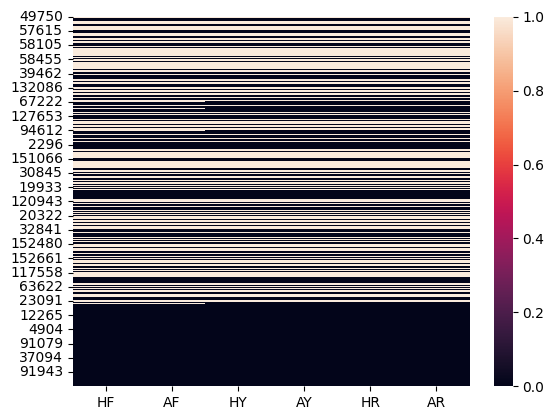

In [696]:
selected_columns = ["HF", "AF", "HY", "AY", "HR", "AR"]
sns.heatmap(df.sort_values(by="Date", ascending=True)[selected_columns].isna())

In [697]:
# Some of the newer matches have reliable fouls and cards data
# We will use those, and drop the old ones
df = df[df["Date"].apply(lambda x: x.year) > 2018].copy()

<Axes: >

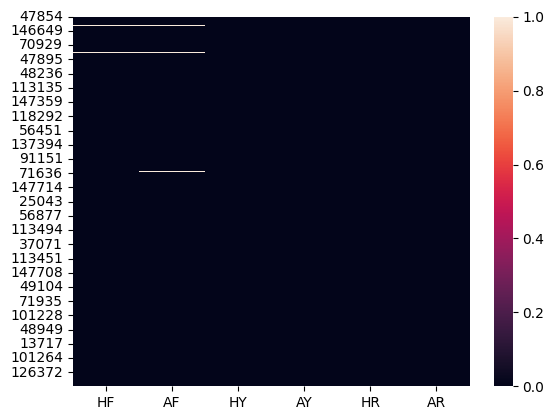

In [698]:
selected_columns = ["HF", "AF", "HY", "AY", "HR", "AR"]
sns.heatmap(df.sort_values(by="Date", ascending=True)[selected_columns].isna())

In [699]:
# The newer seasons have more reliable data, so we can use them
# We will impute the missing values
missing_percentages = pd.DataFrame((df.isna().sum()/df.shape[0]).sort_values(ascending=False))
to_drop = missing_percentages[missing_percentages[0] > 0.2].index
to_drop

Index(['HO', 'AO', 'AHW', 'HHW', 'ABP', 'HBP', 'Attendance', 'HFKC', 'AFKC',
       'Referee'],
      dtype='object')

In [700]:
df = df.drop(to_drop, axis=1).reset_index(drop=True)

missing_percentages = pd.DataFrame((df.isna().sum()/df.shape[0]).sort_values(ascending=False))
missing_percentages.head()

,0
Time,0.143638
HF,0.008783
AF,0.008699
HC,0.000798
HST,0.000756


<Axes: >

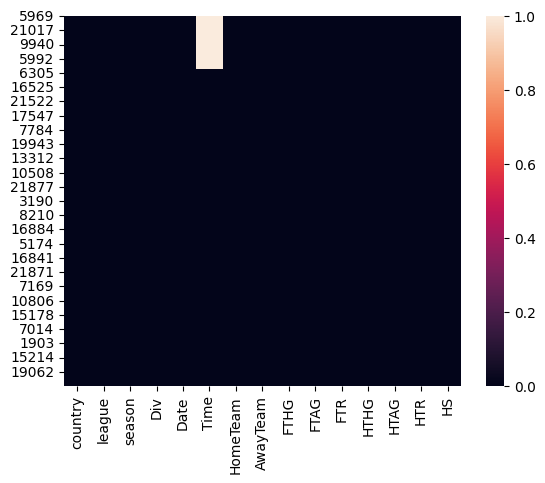

In [701]:
# Great, let's look at all the missing data, and its structure
sns.heatmap(df.sort_values(by="Date", ascending=True)[list(df.columns)[:15]].isna())

<Axes: >

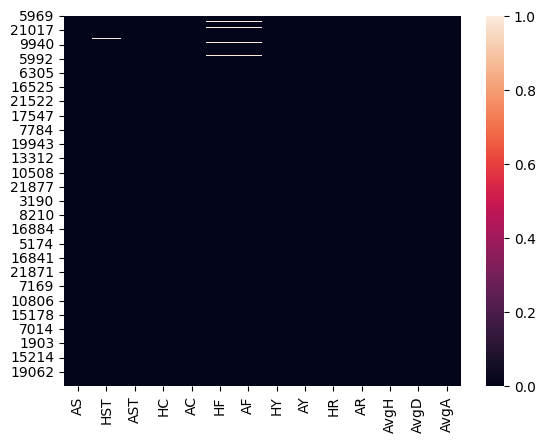

In [702]:
sns.heatmap(df.sort_values(by="Date", ascending=True)[list(df.columns)[15:]].isna())

In [703]:
# This looks very usable, let's move onto outlier analysis

In [704]:
print("Resulting dataframe size:", df.shape[0], "rows and", df.shape[1], "cols")

Resulting dataframe size: 23796 rows and 29 cols


In [722]:
from sklearn.ensemble import IsolationForest

selected_columns = ["FTHG", "FTAG", "HTHG", "HTAG", "AvgH", "AvgD", "AvgA", "HS", "AS", "HR", "AR", "HF", "AF", "HY", "AY"]

clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)
selected_indexes = df.loc[(df["FTHG"]>=0) & (df["FTAG"]>=0)][selected_columns].dropna().index
clf.fit(df.iloc[selected_indexes][selected_columns])
pred = clf.predict(df.iloc[selected_indexes][selected_columns])

In [723]:
outlier_df = df.iloc[selected_indexes][selected_columns].copy()
outlier_df["status"] = pred
outlier_df.loc[outlier_df["status"]==-1].head()

,FTHG,FTAG,HTHG,HTAG,AvgH,AvgD,AvgA,HS,AS,HR,AR,HF,AF,HY,AY,status
99,6.0,0.0,4.0,0.0,1.241667,5.923333,11.391667,16.0,4.0,1.0,0.0,19.0,12.0,1.0,3.0,-1
100,5.0,2.0,3.0,2.0,2.161667,3.358333,3.333333,12.0,10.0,1.0,0.0,8.0,16.0,4.0,2.0,-1
137,2.0,1.0,1.0,0.0,1.118333,8.266667,19.743333,15.0,2.0,0.0,1.0,16.0,13.0,2.0,7.0,-1
143,0.0,5.0,0.0,1.0,5.791667,4.388333,1.520000,2.0,22.0,1.0,0.0,6.0,19.0,2.0,1.0,-1
144,2.0,1.0,2.0,0.0,4.341667,3.911667,1.731667,6.0,25.0,0.0,1.0,16.0,16.0,4.0,4.0,-1


In [724]:
outlier_df["status"].value_counts()

status
 1    22390
-1     1179
Name: count, dtype: int64

In [725]:
from sklearn.model_selection import train_test_split
outlier_df["status"] = outlier_df["status"].apply(lambda x: int(x==-1))
y_list = outlier_df.pop("status")
X_train, X_test, y_train, y_test = train_test_split(outlier_df, y_list, test_size=0.2, stratify=y_list, random_state=42)

In [726]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

c:\Users\vojte\Documents\GitHub\machine_learning_semestral_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [727]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4440,   38],
       [  91,  145]], dtype=int64)

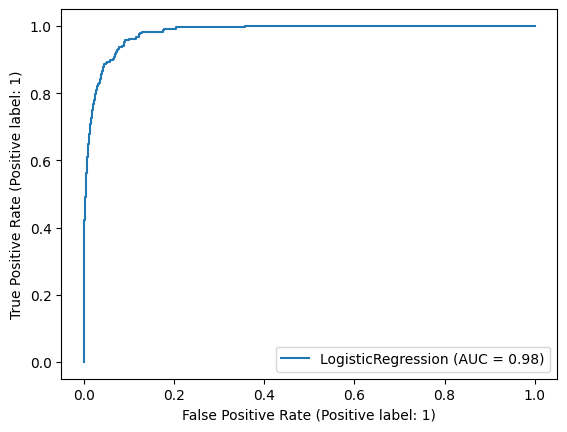

In [728]:
from sklearn.metrics import RocCurveDisplay
# auc_score = roc_auc_score(y_test, y_pred)
# print("AUC:", auc_score)
RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [729]:
outlier_df[["prob_NOUTL", "prob_OUTL"]] = clf.predict_proba(outlier_df)
outlier_df["status"] = y_list

In [730]:
outlier_df.sort_values(by="prob_NOUTL", ascending=True)

,FTHG,FTAG,HTHG,HTAG,AvgH,AvgD,AvgA,HS,AS,HR,AR,HF,AF,HY,AY,prob_NOUTL,prob_OUTL,status
21903,1.0,2.0,1.0,1.0,3.000000,2.870000,2.646667,9.0,7.0,1.0,9.0,11.0,17.0,2.0,2.0,2.005831e-10,1.000000e+00,0
17310,2.0,3.0,2.0,0.0,32.070000,8.806667,1.088333,7.0,23.0,0.0,0.0,15.0,18.0,4.0,2.0,3.647331e-10,1.000000e+00,1
9991,3.0,1.0,2.0,0.0,1.032000,19.100000,41.800000,27.0,2.0,0.0,1.0,9.0,5.0,0.0,3.0,5.638983e-10,1.000000e+00,1
4562,0.0,5.0,0.0,1.0,32.333333,8.250000,1.063333,3.0,29.0,0.0,0.0,15.0,15.0,1.0,1.0,2.951197e-09,1.000000e+00,1
10819,1.0,3.0,0.0,2.0,21.578333,11.971667,1.088333,11.0,12.0,0.0,1.0,18.0,13.0,4.0,1.0,8.626388e-09,1.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556,0.0,1.0,0.0,0.0,2.388333,3.038333,3.151667,5.0,8.0,0.0,0.0,4.0,5.0,1.0,0.0,9.999983e-01,1.673601e-06,0
18494,0.0,0.0,0.0,0.0,2.426667,3.036667,2.890000,9.0,7.0,0.0,0.0,10.0,7.0,0.0,0.0,9.999986e-01,1.442724e-06,0
23308,0.0,0.0,0.0,0.0,2.660000,3.038333,2.825000,1.0,2.0,0.0,0.0,13.0,8.0,1.0,0.0,9.999986e-01,1.395924e-06,0
6568,0.0,0.0,0.0,0.0,2.458333,3.221667,2.906667,12.0,5.0,0.0,0.0,4.0,9.0,0.0,0.0,9.999988e-01,1.177302e-06,0


In [731]:
# Outliers come from data, where one team has a disproportionately high odds (>20)
# Moving on, outliers are data with high amount of fouls and red cards
# Games with high amount of shots fired (>15) are outliers
# Games with 0/0 outcome are not considred outliers
# Small or negative score is not considered outlier behavior
# More than 4 goals by one side is outlier behavior
# Non-zero amount of yellow cards is outlier behavior

In [732]:
full_df = df[selected_columns].dropna().copy()
full_df[["prob_NOUTL", "prob_OUTL"]] = clf.predict_proba(full_df[selected_columns])

In [733]:
full_df["outlier_prob"] = full_df["prob_OUTL"]
df["index_col"] = list(df.index)
full_df["index_col"] = list(full_df.index)
res_df = pd.merge(left=df, right=full_df[["outlier_prob", "index_col"]], on="index_col", how="outer").copy()

In [734]:
res_df["outlier_prob"] = res_df["outlier_prob"].fillna(res_df["outlier_prob"].mean())
temp = res_df.pop("index_col")

In [735]:
res_df.sort_values(by="outlier_prob", ascending=False).to_csv("train_with_outlier_prob.csv")

In [737]:
res_df.loc[res_df["outlier_prob"] > 0.9].shape[0] / res_df.shape[0]

0.018364430996806187